# Prediction of The Occurrence of Heart Failure

# Aim
This project aims to predict the occurrence of heart failure and extract its most important associative factors through multiple classificational algorithms.


# Data Import and Exploration


In [1]:
# import what we need here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import os
import time


In [2]:
# the data source
# the corresponding file is available at https://www.kaggle.com/datasets/ineubytes/heart-disease-dataset/code?resource=download
# If you use google colab, PLEASE put the corresponding csv dataset into the root directory of the colab!!! 
# The file will be deleted everytime in google colab!!! And you might use additional code to setup the environment.
# If you use jupyter lab, make sure that you set the directory to the place where the corresponding csv file located.

# os.getcwd()
# os.chdir('your directory goes here')

df = pd.read_csv('heart.csv')


In [3]:
# explore data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# see the completness and more of this dataframe
df.info()
# there are only 1025 records in this dataset
# however, all the data, including categorical and numerical, are expressed in numeric form
# so the preprocessing is required

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe()
# this sector is mainly see the overall value distribution of each var

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Feature Information

**age**: age in years

**sex**: (1 = male; 0 = female)

**cp**: chest pain type (0/1/2/3)

**trestbps**: resting blood pressure (in mm Hg on admission to the hospital)

**chol**: serum cholestoral in mg/dl

**fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

**restecg**: resting electrocardiographic results

**thalach**: maximum heart rate achieved

**exang**: exercise induced angina (1 = yes; 0 = no)

**oldpeak**: ST depression induced by exercise relative to rest

**slope**: the slope of the peak exercise ST segment

**ca**: number of major vessels (0-3) colored by flourosopy

**thal**: 1 = normal; 2 = fixed defect; 3 = reversable defect

**target**: (0 = did not occur, 1 = occur)



In [6]:
# check the unique value of each feature
pd.set_option('display.max_rows', None) # in case if there are too many features
df.nunique()

# numeric: 'age', 'trestbps', 'chol', 'thalach', 'oldpeak'
# binary: 'sex', 'fbs', 'exang', 'target'  -> ordinal encoder
# multi-catagorical: 'cp', 'restecg', 'slope', 'ca', 'thal'  -> one hot encoding

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [7]:
# check missing value
df.isnull().sum() # very lucky to have no missing value here

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# check duplicated record
df.duplicated().where(df.duplicated() != False).count()
# there are 723 "duplicated records here, however, due to the lack of id, we could not rule out the possibility that multiple patients have the same exam results"

723

In [9]:
# get target variable
y = df['target']

In [10]:
# descriptive statistics of the continuous variables
numeric_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[numeric_var].describe()
# it seems that there is no out-of-scope value according to the clinical-business usecase

,age,trestbps,chol,thalach,oldpeak
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512
std,9.072290,17.516718,51.59251,23.005724,1.175053
min,29.000000,94.000000,126.00000,71.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000
75%,61.000000,140.000000,275.00000,166.000000,1.800000
max,77.000000,200.000000,564.00000,202.000000,6.200000


#### Visulizing data

1. Descriptive statistics

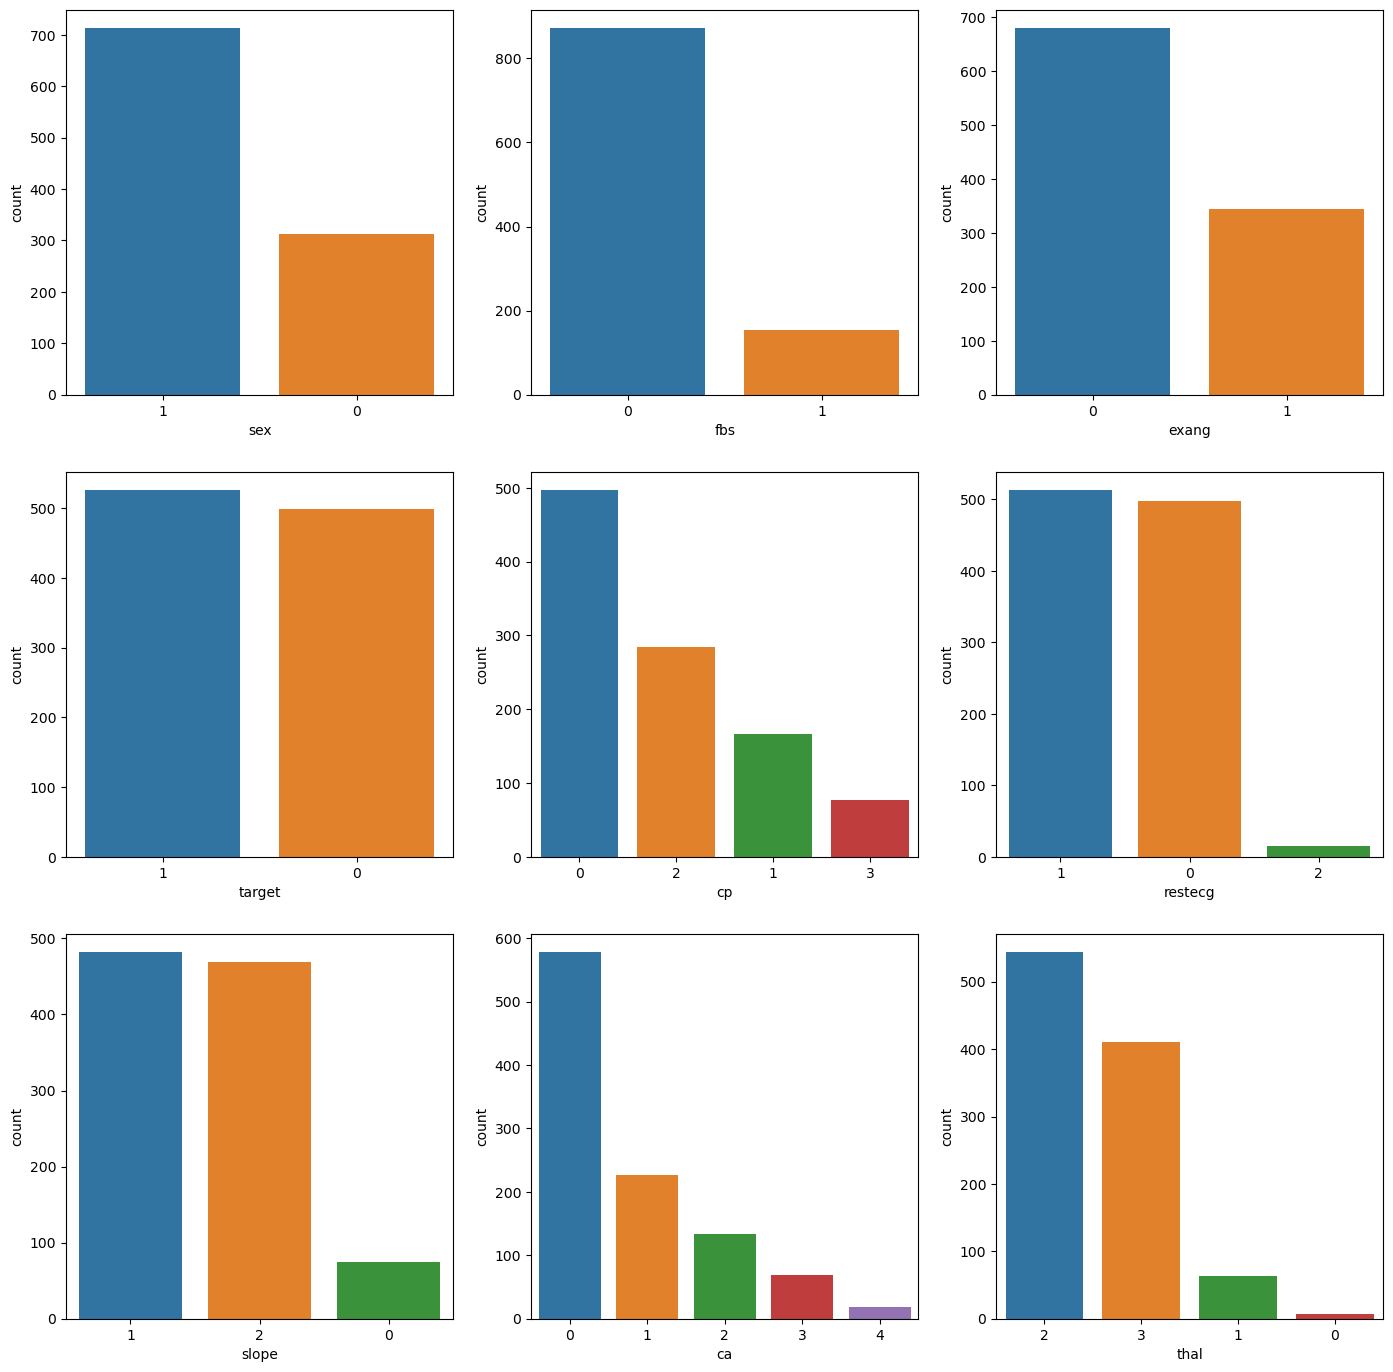

In [11]:
 # for catagorical variables
_,axss = plt.subplots(3,3, figsize=[17,17]) # set canvas
cat_var = ['sex', 'fbs', 'exang', 'target', 'cp', 'restecg', 'slope', 'ca', 'thal']
idx = 0
for var in cat_var:
    sns.countplot(x=var, data= df, order =df[var].value_counts().index, ax = axss[idx // 3][idx % 3])
    idx += 1

# it seems that all the categorical vars are associated with HF occurrance, 
# but there's some outliers occurred in ca (ca = 4) and thal (thal = 0)

1. there's some outliers (illegal value) occurred in ca (ca = 4) and thal (thal = 0)
2. due to the excessive categorical imbalance in restecg category, I decide to merge 1 and 2 after checking the interpretation of the resting electrocardiographic results

These are the issues that need to be solved during data preprocessing

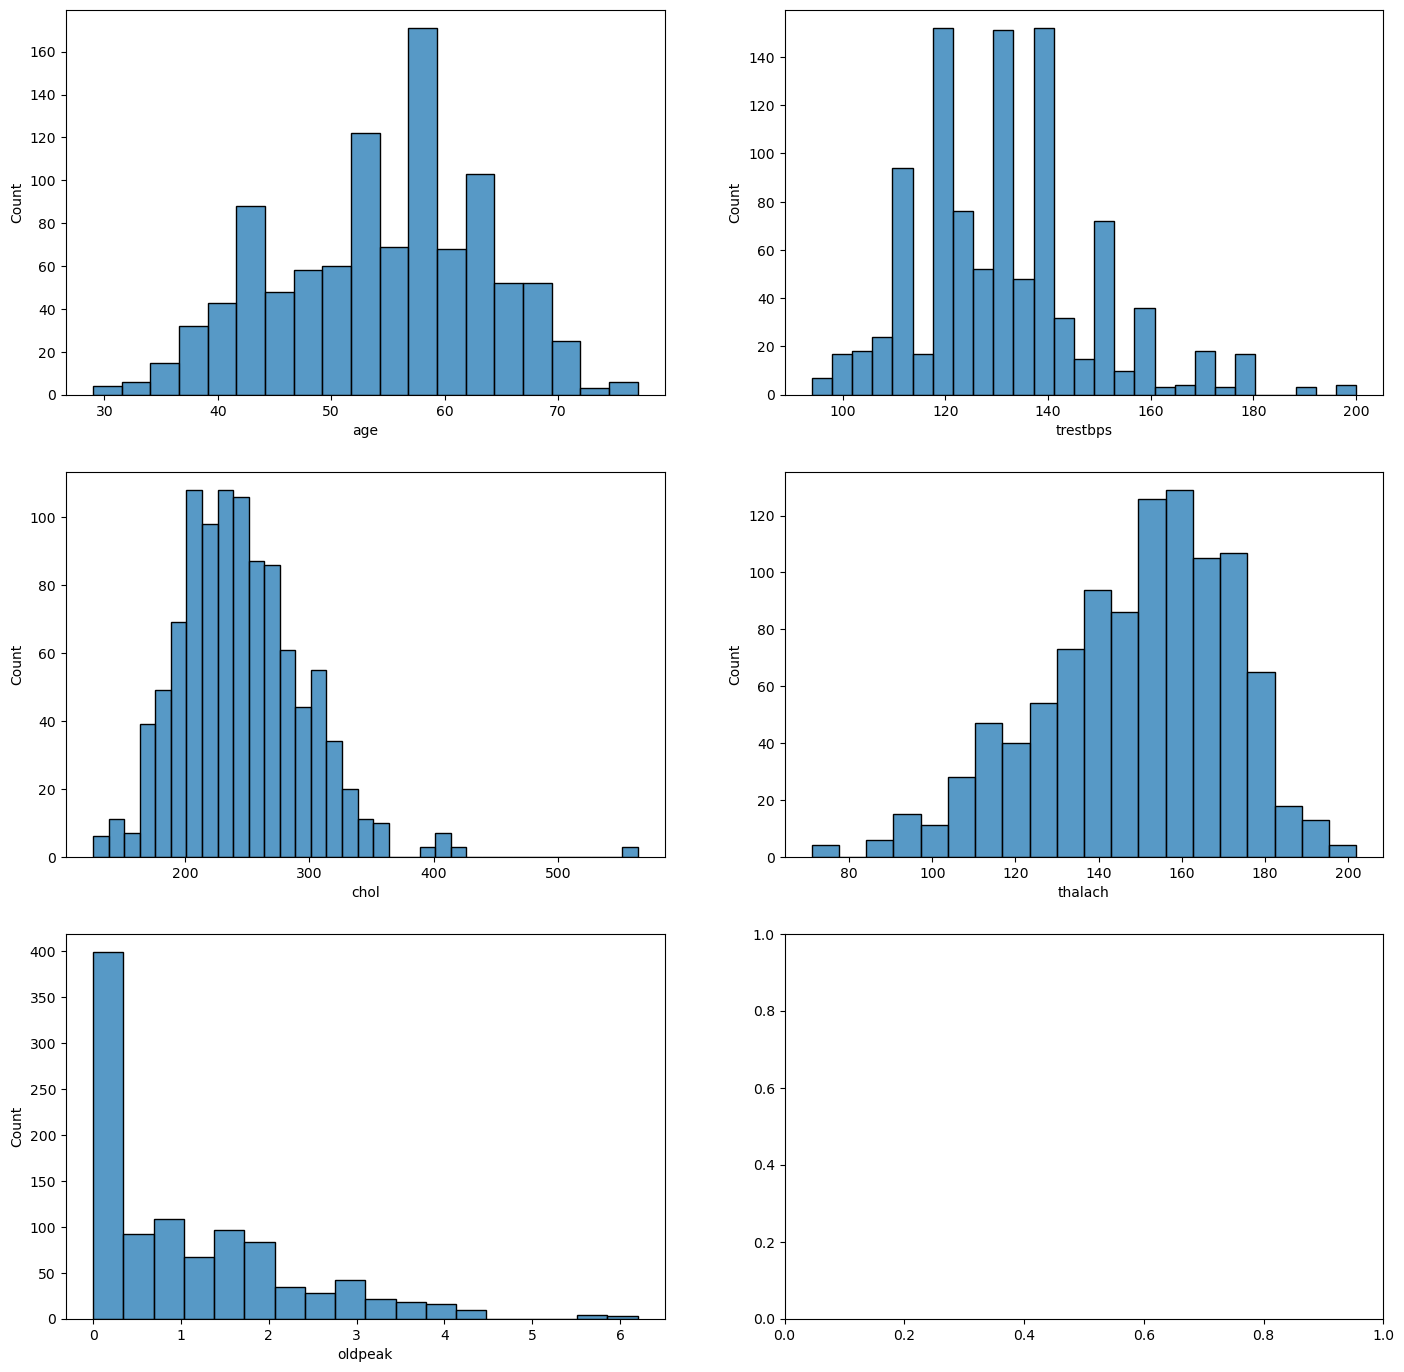

In [12]:
# for numeric variables
# numeric_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
_,axss = plt.subplots(3,2, figsize=[17,17]) # set canvas
idx = 0
for var in numeric_var:
    sns.histplot(x=var, data= df, ax = axss[idx // 2][idx % 2])
    idx += 1


1. The distribution of age and thalach are slightly negatively skewed, that of trestbps and chols are positively skewed to the different extend. However, that of oldpeak is almost exponential.
2. There are no absolute "outlier" according to the medical use case

3. See the inter-correlation among variables

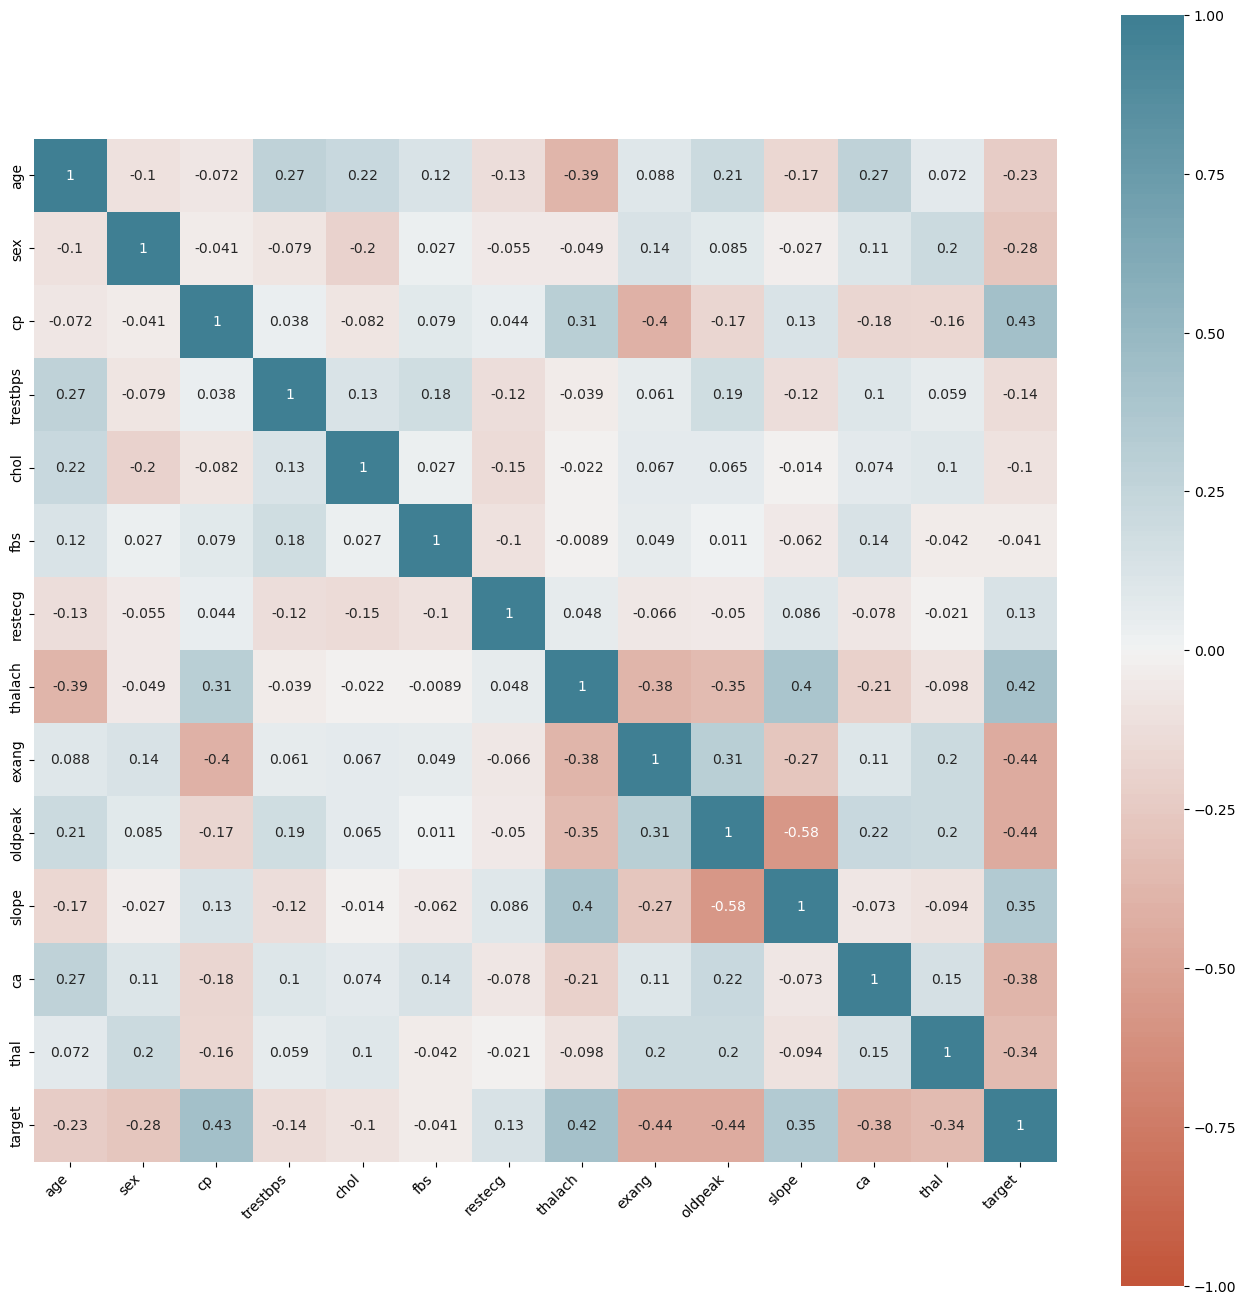

In [13]:
# the correlation heat map
plt.figure(figsize = (16.5, 16.5))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')
plt.show()

# it seems that 'oldpeak' and 'slope' are highly correlated with each other, 
# they are the value derived from EEG (electrocardiogram).
# however, they are not too inter-correlated

3. Compare between two groups

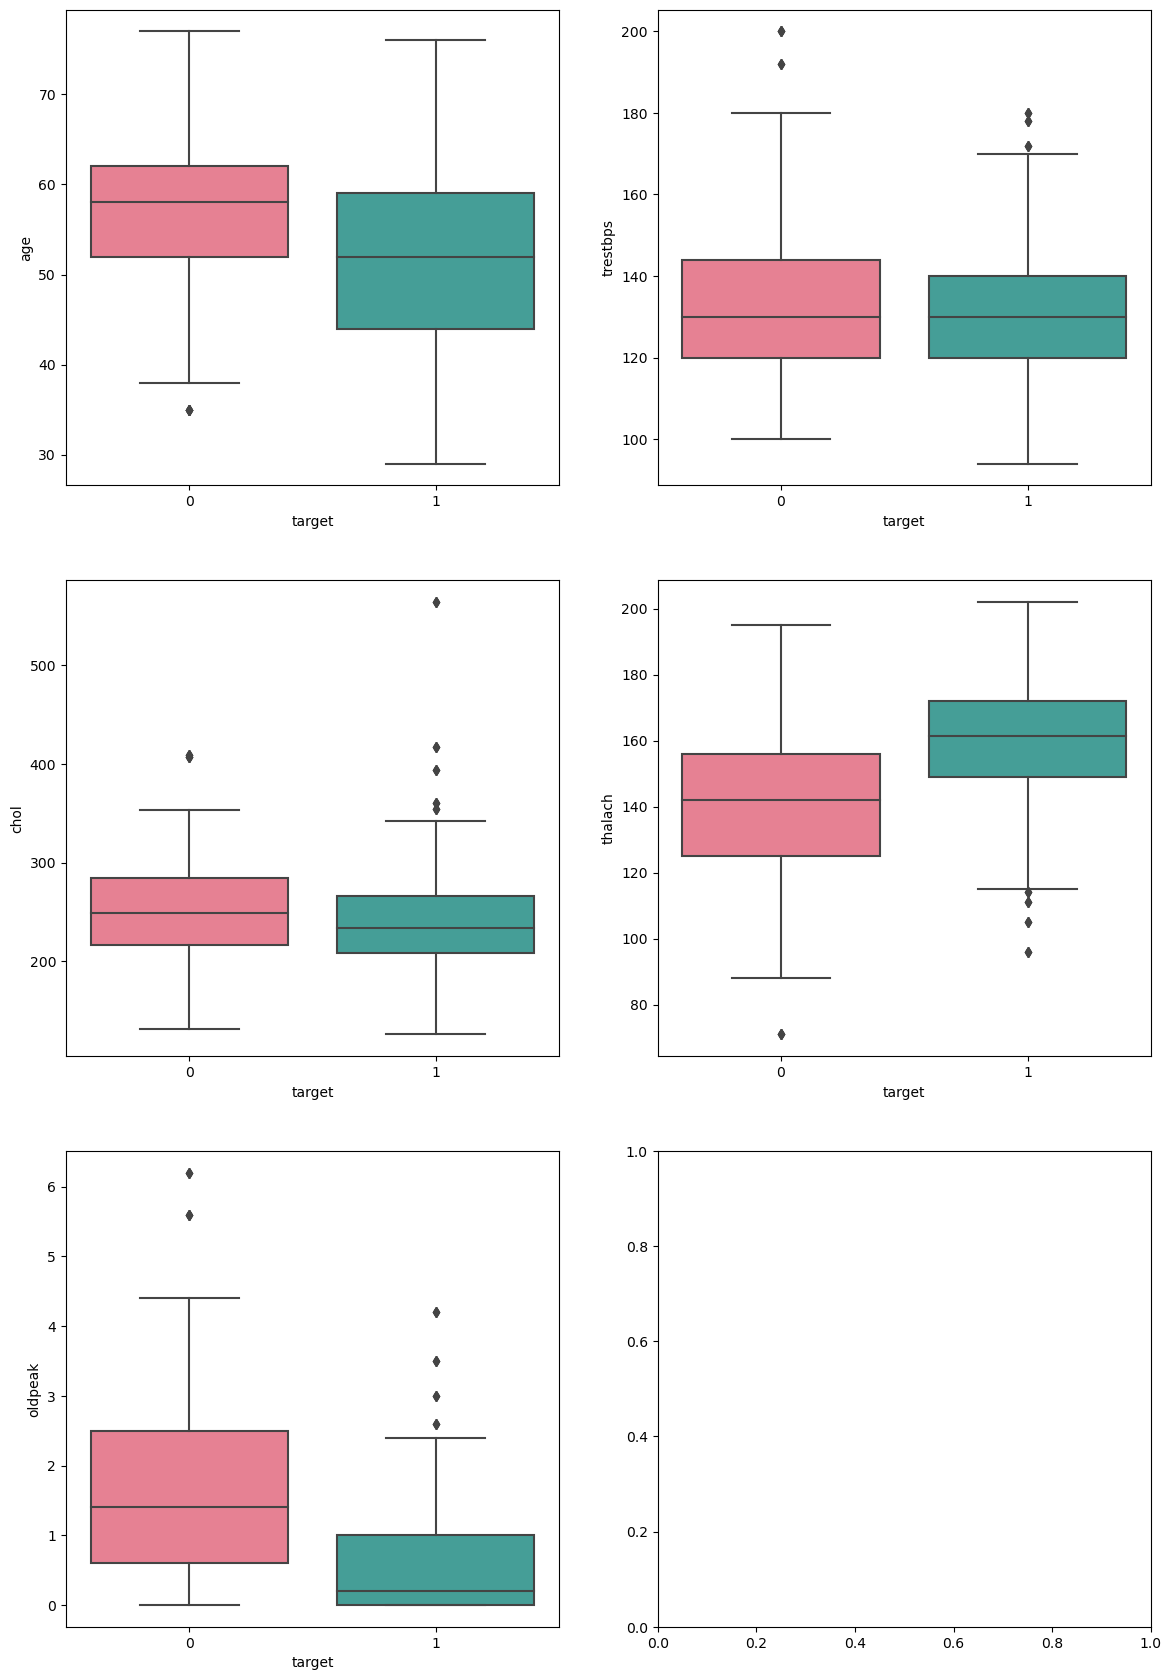

In [14]:
# numeric variable
_,axss = plt.subplots(3,2, figsize=[14,21]) # set canvas

idx = 0
for var in numeric_var:
    sns.boxplot(x = 'target', y = var, data = df, palette = 'husl', ax = axss[idx // 2][idx % 2])
    idx += 1

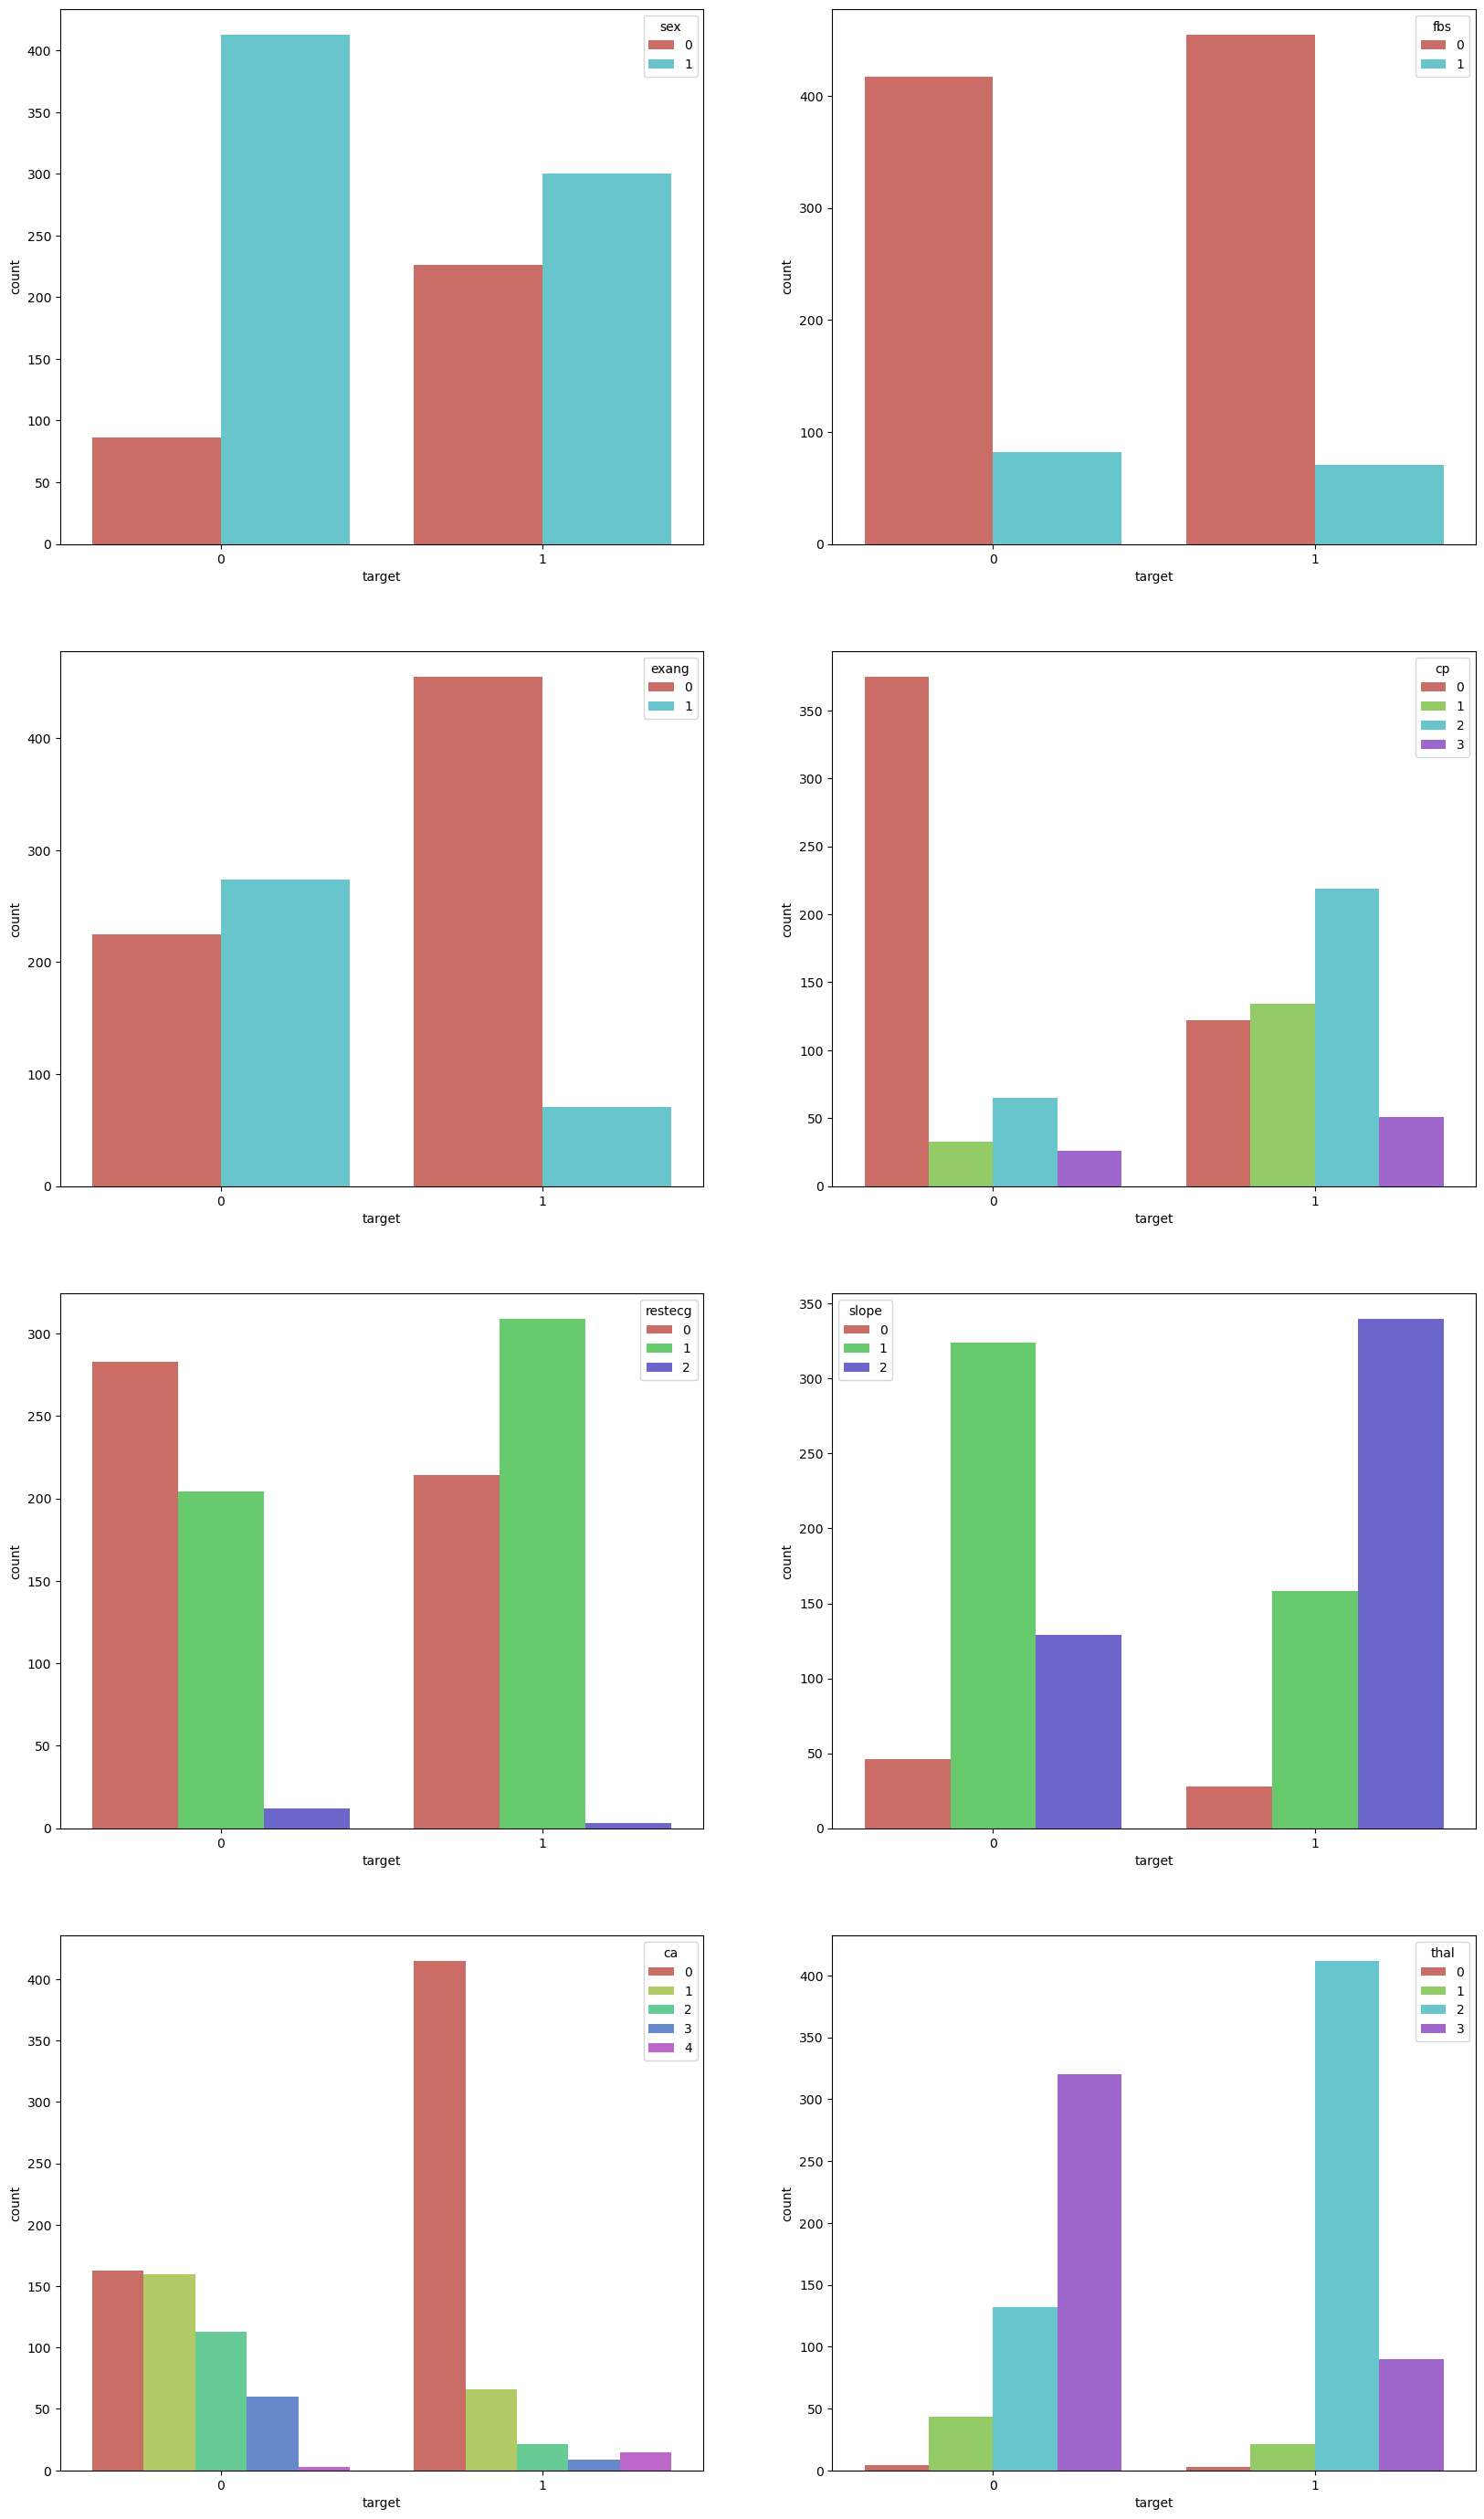

In [15]:
# categorical variable
_,axss = plt.subplots(4,2, figsize=[20,35]) # set canvas

idx = 0
for var in cat_var:
    if var == 'target': continue   # don't put the grouping factor into the x axis!!!
    sns.countplot(x = 'target', hue = var, data = df, palette = 'hls', ax = axss[idx // 2][idx % 2])
    idx += 1



Seeming that the distribution of the patient with different result are significantly vary

# Feature Preprocessing

In [16]:
# dispose of outlier (non-delete method)
# there's some outliers (illegal value) occurred in ca (ca = 4) and thal (thal = 0) -> 
# df['ca'] == 4 -> 3; df['thal'] == 0 -> 1
df['ca'] = df['ca'].replace(4,3)
df['thal'] = df['thal'].replace(0, 1)

# due to the excessive categorical imbalance in 'restecg' category, 
# I decide to merge 1 and 2 after checking the interpretation of the resting electrocardiographic results
# df['restecg'] = 2 -> 1
df['restecg'] = df['restecg'].replace(2,1)

# then 'restecg' would be a binary variable


In [17]:
# change categorical vars into objects
# numeric: 'age', 'trestbps', 'chol', 'thalach', 'oldpeak'
# binary: 'sex', 'fbs', 'exang', 'target', 'restecg'  -> ordinal encoder
# multi-catagorical: 'cp', 'slope', 'ca', 'thal'  -> one hot encoding

cat_var = ['sex', 'fbs', 'exang', 'target', 'cp', 'restecg', 'slope', 'ca', 'thal']

for var in cat_var:
  df[var] = df[var].astype('object')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   object 
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   object 
 6   restecg   1025 non-null   object 
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   object 
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   object 
 11  ca        1025 non-null   object 
 12  thal      1025 non-null   object 
 13  target    1025 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 112.2+ KB


In [18]:
# for binary variables, ordinary encoder is enough
from sklearn.preprocessing import OrdinalEncoder
bin_var = ['sex', 'fbs', 'exang', 'target', 'restecg']
enc_oe = OrdinalEncoder()

for bins in bin_var:
  enc_oe.fit(df[[bins]])
  df[[bins]] = enc_oe.transform(df[[bins]])

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1.0,0,125,212,0.0,1.0,168,0.0,1.0,2,2,3,0.0
1,53,1.0,0,140,203,1.0,0.0,155,1.0,3.1,0,0,3,0.0
2,70,1.0,0,145,174,0.0,1.0,125,1.0,2.6,0,0,3,0.0
3,61,1.0,0,148,203,0.0,1.0,161,0.0,0.0,2,1,3,0.0
4,62,0.0,0,138,294,1.0,1.0,106,0.0,1.9,1,3,2,0.0


In [19]:
# for nulti-categorical variables, they need one-hot encoding (transform them into dummy vars)
from sklearn.preprocessing import OneHotEncoder

multi_cat = ['cp', 'slope', 'ca', 'thal']

def OneHotEncoding(df, enc, categories):  
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names_out(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

enc_ohe = OneHotEncoder()
enc_ohe.fit(df[multi_cat])

df = OneHotEncoding(df, enc_ohe, multi_cat)



In [20]:
df.info()
# 'cp', 'slope', 'ca', 'thal' are are assigned as dummy vars

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   float64
 2   trestbps  1025 non-null   int64  
 3   chol      1025 non-null   int64  
 4   fbs       1025 non-null   float64
 5   restecg   1025 non-null   float64
 6   thalach   1025 non-null   int64  
 7   exang     1025 non-null   float64
 8   oldpeak   1025 non-null   float64
 9   target    1025 non-null   float64
 10  cp_0      1025 non-null   float64
 11  cp_1      1025 non-null   float64
 12  cp_2      1025 non-null   float64
 13  cp_3      1025 non-null   float64
 14  slope_0   1025 non-null   float64
 15  slope_1   1025 non-null   float64
 16  slope_2   1025 non-null   float64
 17  ca_0      1025 non-null   float64
 18  ca_1      1025 non-null   float64
 19  ca_2      1025 non-null   float64
 20  ca_3      1025 non-null   floa

In [21]:
# standarize continuous data
from sklearn.preprocessing import StandardScaler
numeric_var
scaler = StandardScaler()
scaler.fit(df[numeric_var])

df[numeric_var] = scaler.transform(df[numeric_var])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,-0.268437,1.0,-0.377636,-0.659332,0.0,1.0,0.821321,0.0,-0.060888,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.158157,1.0,0.479107,-0.833861,1.0,0.0,0.255968,1.0,1.727137,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.716595,1.0,0.764688,-1.396233,0.0,1.0,-1.048692,1.0,1.301417,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.724079,1.0,0.936037,-0.833861,0.0,1.0,0.516900,0.0,-0.912329,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.834359,0.0,0.364875,0.930822,1.0,1.0,-1.874977,0.0,0.705408,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### Separate them into train-test dataset

In [22]:
from sklearn import model_selection
y = df['target']
x = df.drop('target', axis = 1)

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.1, stratify = y, random_state = 1) 
#stratified sampling

print('training data has ' + str(x_train.shape[0]) + ' observation with ' + str(x_train.shape[1]) + ' features')
print('test data has ' + str(x_test.shape[0]) + ' observation with ' + str(x_test.shape[1]) + ' features')


training data has 922 observation with 23 features
test data has 103 observation with 23 features


# Model Training & Evaluation

In [23]:
#@title build models
# There are three models we are going to use during this project
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# This is for confusion matrix
from sklearn import metrics, model_selection 


# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

# Support Vector Classification
classifier_SVC = SVC(probability=True)

# GB classifier
classifier_GB = GradientBoostingClassifier()

# Gaussian Naive Bayes
classifier_NB = GaussianNB()

Logistic Regressional Classifier

For Logistic Regressional Classifier, the acc is 86.77   (82.07  ~ 91.47999999999999) %


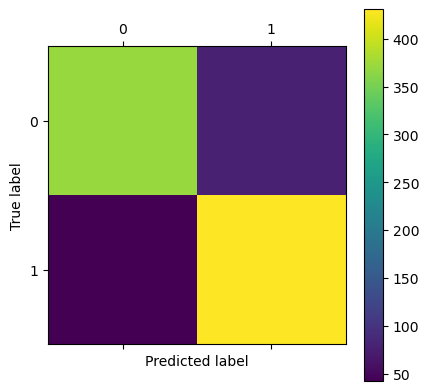

              precision    recall  f1-score   support

         0.0       0.90      0.83      0.86       449
         1.0       0.85      0.91      0.88       473

    accuracy                           0.87       922
   macro avg       0.87      0.87      0.87       922
weighted avg       0.87      0.87      0.87       922



In [24]:
#@title Logistic Regressional Classifier & evaluation (by default)
classifier_logistic.fit(x_train, y_train) # train model
y_predict = classifier_logistic.predict(x_train) # predict results

# too stochastic, so I don't use point estimation to measure such a result
# res_1 = classifier_logistic.score(x_train, y_train)
# print(f'The acc for logistic classifier is {round(res_1 * 100, 3)}%')  

# cross validation
scores = model_selection.cross_val_score(classifier_logistic, x_train, y_train, cv = 10)
print(f'For Logistic Regressional Classifier, the acc is {round(scores.mean() * 100, 2)} \
  ({round(scores.mean() * 100 - scores.std() * 100 * 1.96, 2)}\
  ~ {round(scores.mean() * 100, 2) + round(scores.std() * 100 * 1.96, 2)}) %')

# Confusion Matrix
cm = metrics.confusion_matrix(y_train, y_predict)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(metrics.classification_report(y_train, y_predict))


### KNN Classifier

For KNN, the acc is 82.86   (74.92  ~ 90.78999999999999) %


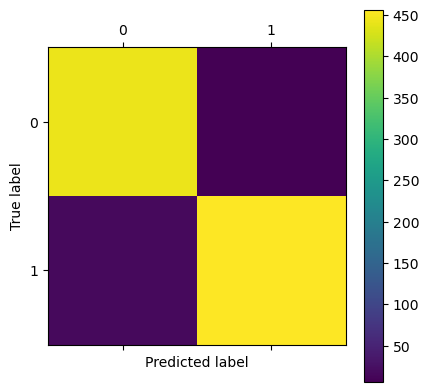

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       449
         1.0       0.99      0.96      0.98       473

    accuracy                           0.98       922
   macro avg       0.98      0.98      0.98       922
weighted avg       0.98      0.98      0.98       922



In [25]:
#@title KNN Classifier
classifier_KNN.fit(x_train, y_train) # train model
y_predict = classifier_KNN.predict(x_train) # predict results

# cross validation
scores = model_selection.cross_val_score(classifier_KNN, x_train, y_train, cv = 10)
print(f'For KNN, the acc is {round(scores.mean() * 100, 2)} \
  ({round(scores.mean() * 100 - scores.std() * 100 * 1.96, 2)}\
  ~ {round(scores.mean() * 100, 2) + round(scores.std() * 100 * 1.96, 2)}) %')

# Confusion Matrix
cm = metrics.confusion_matrix(y_train, y_predict)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(metrics.classification_report(y_train, y_predict))

Random Forest

For RF, the acc is 99.67   (98.31  ~ 101.03) %


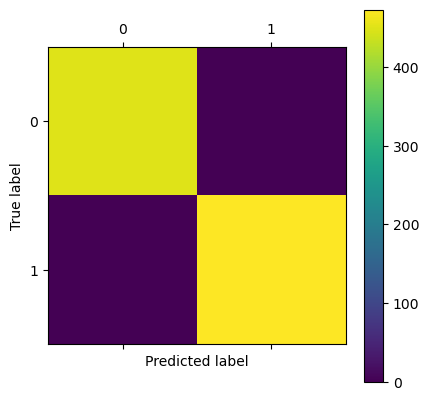

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       449
         1.0       1.00      1.00      1.00       473

    accuracy                           1.00       922
   macro avg       1.00      1.00      1.00       922
weighted avg       1.00      1.00      1.00       922



In [26]:
#@title Random Forest
classifier_RF.fit(x_train, y_train) # train model
y_predict = classifier_RF.predict(x_train) # predict results

# cross validation
scores = model_selection.cross_val_score(classifier_RF, x_train, y_train, cv = 10)
print(f'For RF, the acc is {round(scores.mean() * 100, 2)} \
  ({round(scores.mean() * 100 - scores.std() * 100 * 1.96, 2)}\
  ~ {round(scores.mean() * 100, 2) + round(scores.std() * 100 * 1.96, 2)}) %')

# Confusion Matrix
cm = metrics.confusion_matrix(y_train, y_predict)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(metrics.classification_report(y_train, y_predict))

# It is all correct in training dataset, is that overfitting?

SVC

For SVC, the acc is 93.27   (88.14  ~ 98.39999999999999) %


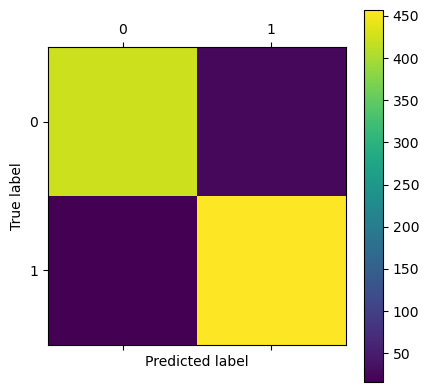

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       449
         1.0       0.95      0.97      0.96       473

    accuracy                           0.95       922
   macro avg       0.95      0.95      0.95       922
weighted avg       0.95      0.95      0.95       922



In [27]:
#@title SVC
classifier_SVC.fit(x_train, y_train) # train model
y_predict = classifier_SVC.predict(x_train) # predict results

# cross validation
scores = model_selection.cross_val_score(classifier_SVC, x_train, y_train, cv = 10)
print(f'For SVC, the acc is {round(scores.mean() * 100, 2)} \
  ({round(scores.mean() * 100 - scores.std() * 100 * 1.96, 2)}\
  ~ {round(scores.mean() * 100, 2) + round(scores.std() * 100 * 1.96, 2)}) %')

# Confusion Matrix
cm = metrics.confusion_matrix(y_train, y_predict)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(metrics.classification_report(y_train, y_predict))



GB Classifier

For GB Classifier, the acc is 97.18   (93.85  ~ 100.51) %


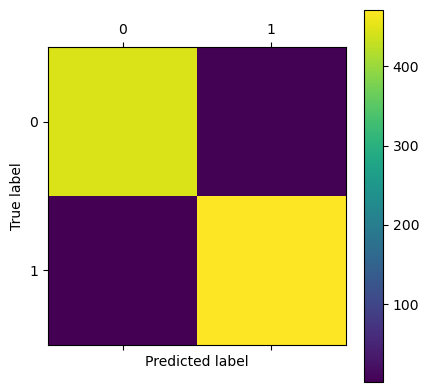

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       449
         1.0       0.99      1.00      0.99       473

    accuracy                           0.99       922
   macro avg       0.99      0.99      0.99       922
weighted avg       0.99      0.99      0.99       922



In [28]:
#@title GB Classifier
classifier_GB.fit(x_train, y_train) # train model
y_predict = classifier_GB.predict(x_train) # predict results

# cross validation
scores = model_selection.cross_val_score(classifier_GB, x_train, y_train, cv = 10)
print(f'For GB Classifier, the acc is {round(scores.mean() * 100, 2)} \
  ({round(scores.mean() * 100 - scores.std() * 100 * 1.96, 2)}\
  ~ {round(scores.mean() * 100, 2) + round(scores.std() * 100 * 1.96, 2)}) %')

# Confusion Matrix
cm = metrics.confusion_matrix(y_train, y_predict)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(metrics.classification_report(y_train, y_predict))

### Naive Bayes

For Naive Bayes Classifier, the acc is 86.01   (80.25  ~ 91.77000000000001) %


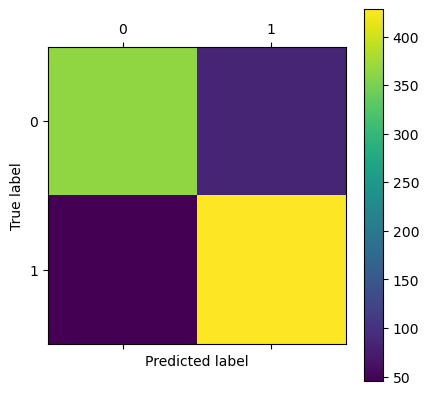

              precision    recall  f1-score   support

         0.0       0.89      0.81      0.85       449
         1.0       0.84      0.90      0.87       473

    accuracy                           0.86       922
   macro avg       0.86      0.86      0.86       922
weighted avg       0.86      0.86      0.86       922



In [29]:
classifier_NB.fit(x_train, y_train, sample_weight=None) # train model
y_predict = classifier_NB.predict(x_train) # predict results

# cross validation
scores = model_selection.cross_val_score(classifier_NB, x_train, y_train, cv = 10)
print(f'For Naive Bayes Classifier, the acc is {round(scores.mean() * 100, 2)} \
  ({round(scores.mean() * 100 - scores.std() * 100 * 1.96, 2)}\
  ~ {round(scores.mean() * 100, 2) + round(scores.std() * 100 * 1.96, 2)}) %')

# Confusion Matrix
cm = metrics.confusion_matrix(y_train, y_predict)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(metrics.classification_report(y_train, y_predict))

Optimize Hyperparameters

In [30]:
#@title Prelude
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

Model 1 - Logistic Regression

In [31]:
parameters = {
    'penalty':('l2','l1'), 
    'C':(0.036, 0.037, 0.038, 0.039, 0.040, 0.041, 0.042)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv = 10)
Grid_LR.fit(x_train, y_train)

# the best hyperparameter combination
# C = 1/lambda
print_grid_search_metrics(Grid_LR) 

Best score: 0.8655095839177186
Best parameters set:
C:0.039
penalty:l2


The test acc of the "best" model for logistic regression is 86.40776699029125 %


C:\Users\Raymo\AppData\Local\Temp\ipykernel_16328\314962870.py:10: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  res = (LR_models.pivot(index='param_penalty', columns='param_C', values='mean_test_score')


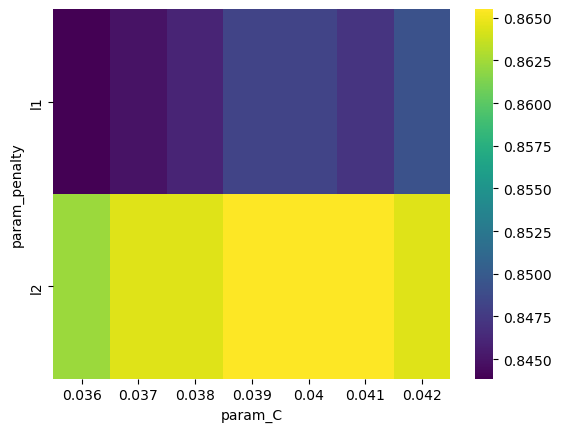

In [32]:
# Use the LR model with the "best" parameter
best_LR_model = Grid_LR.best_estimator_

best_LR_model.predict(x_test)

print('The test acc of the "best" model for logistic regression is', best_LR_model.score(x_test, y_test) * 100, '%')

# mapping the relationship between each parameter and the corresponding acc
LR_models = pd.DataFrame(Grid_LR.cv_results_)
res = (LR_models.pivot(index='param_penalty', columns='param_C', values='mean_test_score')
            )
_ = sns.heatmap(res, cmap='viridis')

Model 2 - KNN Model

In [33]:
# timing
start = time.time()

# Choose k and more
parameters = {
    'n_neighbors':[7,8,9,10,11,12,13,14,15],
    'weights':['uniform', 'distance'],
    'leaf_size':[1,2,3,4,5,6,7],
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=10)
Grid_KNN.fit(x_train, y_train)

# the best hyperparameter combination
print_grid_search_metrics(Grid_KNN)  

end = time.time()
print(f'For KNN, it took {(end - start)/(9 * 2 * 7)} seconds per parameter attempt')

Best score: 0.9967391304347826
Best parameters set:
leaf_size:1
n_neighbors:9
weights:distance
For KNN, it took 0.47145533183264354 seconds per parameter attempt


In [34]:
best_KNN_model = Grid_KNN.best_estimator_

best_KNN_model.predict(x_test)

print('The test acc of the "best" model for KNN is', best_KNN_model.score(x_test, y_test) * 100, '%')

# too many dimentions to map the relationship among hyperparameters and acc...

The test acc of the "best" model for KNN is 100.0 %


Model 3 - RF

In [35]:
# timing
start = time.time()

# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [65, 64, 63, 62, 61, 60],
    'max_depth': [8,9,10,11]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=10)
Grid_RF.fit(x_train, y_train)

# the best hyperparameter combination
print_grid_search_metrics(Grid_RF) 

end = time.time()
print(f'For Random Forest, it took {(end - start)/(6 * 4)} seconds per parameter attempt')

Best score: 0.9967391304347826
Best parameters set:
max_depth:10
n_estimators:63
For Random Forest, it took 0.8909438053766886 seconds per parameter attempt


In [36]:
best_RF_model = Grid_RF.best_estimator_

best_RF_model.predict(x_test)

print('The test acc of the "best" model for RF is', best_RF_model.score(x_test, y_test) * 100, '%')

The test acc of the "best" model for RF is 100.0 %


Model 4 - SVC

In [37]:
# timing
start = time.time()

# Possible hyperparamter options for SVC
parameters = {
    'C' : [9, 10, 11, 12],
    'degree': [0,1,2],
}
Grid_SVC = GridSearchCV(SVC(probability = True), parameters, cv=10)
Grid_SVC.fit(x_train, y_train)

# the best hyperparameter combination
print_grid_search_metrics(Grid_SVC)  

end = time.time()
print(f'For SVC, it took {(end - start)/(4 * 3)} seconds per parameter attempt')

Best score: 0.9945652173913043
Best parameters set:
C:11
degree:0
For SVC, it took 0.6149195631345113 seconds per parameter attempt


In [38]:
best_SVC_model = Grid_SVC.best_estimator_

best_SVC_model.predict(x_test)

print('The test acc of the "best" model for SVC is', best_SVC_model.score(x_test, y_test) * 100, '%')

The test acc of the "best" model for SVC is 100.0 %


Model 5 - GB Classifier

In [39]:
# Possible hyperparamter options for GB Classifier
parameters = {
    'learning_rate' : [0.8, 0.9, 1.0],
    'n_estimators': [63, 64, 65],
    'subsample': [0.95, 1.0, 1.05],
    'min_samples_split':[0.725, 0.75, 0.775]
}
Grid_GB = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10)
Grid_GB.fit(x_train, y_train)

# the best hyperparameter combination
print_grid_search_metrics(Grid_GB)  

Best score: 0.9619798971482
Best parameters set:
learning_rate:0.9
min_samples_split:0.75
n_estimators:64
subsample:1.0


C:\Users\Raymo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Raymo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Raymo\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 420, in fit
    self._validate_params()
  File "C:\Users\Raymo\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Raymo\anaconda3\lib\site-packages

In [40]:
best_GB_model = Grid_GB.best_estimator_

best_GB_model.predict(x_test)

print('The test acc of the "best" model for GB classifier is', best_GB_model.score(x_test, y_test) * 100, '%')

The test acc of the "best" model for GB classifier is 93.20388349514563 %


Model 6 - Gaussian Naive Bayes

In [41]:
# Possible hyperparamter options for Gaussian Naive Bayes
parameters = {
    'var_smoothing' : [0.17, 0.18, 0.19],
}
Grid_NB = GridSearchCV(GaussianNB(), parameters, cv=10)
Grid_NB.fit(x_train, y_train)

# the best hyperparameter combination
print_grid_search_metrics(Grid_NB)  

Best score: 0.8590112201963536
Best parameters set:
var_smoothing:0.18


In [42]:
best_NB_model = Grid_NB.best_estimator_

best_NB_model.predict(x_test)

print('The test acc of the "best" model for Gaussian Naive Bayes classifier is', best_NB_model.score(x_test, y_test) * 100, '%')

The test acc of the "best" model for Gaussian Naive Bayes classifier is 80.58252427184466 %


## Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy, f1-Score)
**Precision**(PPV, positive predictive value): tp / (tp + fp);
High Precision means low fp

**Recall**(sensitivity, hit rate, true positive rate): tp / (tp + fn)

**Accurracy**: (tp + tn) / (tp + tn + fp + fn)

**f1-Score**: (2 * P * R) / (P + R)

Model 1 - Logistic Regression

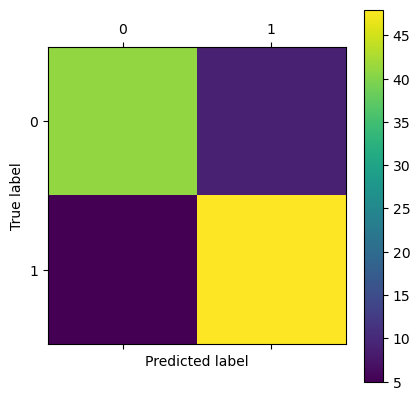

              precision    recall  f1-score   support

         0.0       0.89      0.82      0.85        50
         1.0       0.84      0.91      0.87        53

    accuracy                           0.86       103
   macro avg       0.87      0.86      0.86       103
weighted avg       0.87      0.86      0.86       103



In [43]:
cm = metrics.confusion_matrix(y_test, best_LR_model.predict(x_test))
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(metrics.classification_report(y_test, best_LR_model.predict(x_test)))


Model 2 - KNN Model

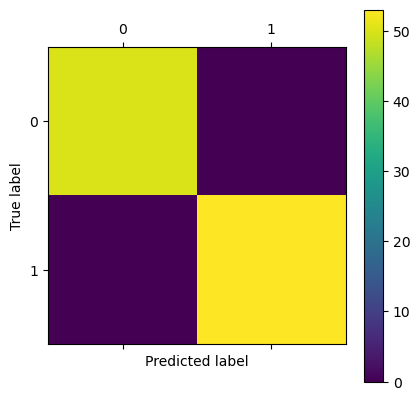

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       1.00      1.00      1.00        53

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103



In [44]:
cm = metrics.confusion_matrix(y_test, best_KNN_model.predict(x_test))
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(metrics.classification_report(y_test, best_KNN_model.predict(x_test)))

Model 3 - RF

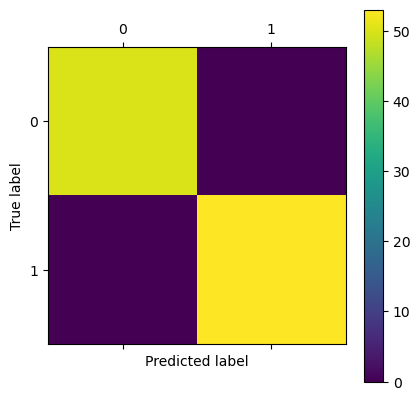

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       1.00      1.00      1.00        53

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103



In [45]:
cm = metrics.confusion_matrix(y_test, best_RF_model.predict(x_test))
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(metrics.classification_report(y_test, best_RF_model.predict(x_test)))

Model 4 - SVC

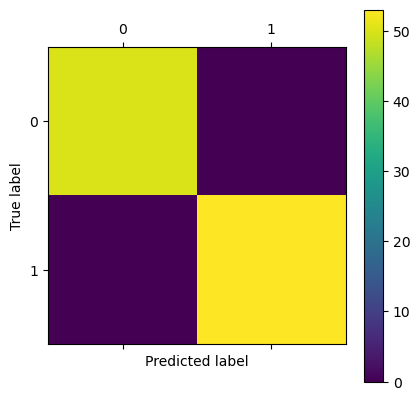

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       1.00      1.00      1.00        53

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103



In [46]:
cm = metrics.confusion_matrix(y_test, best_SVC_model.predict(x_test))
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(metrics.classification_report(y_test, best_SVC_model.predict(x_test)))

Model 5 - GB Classifier

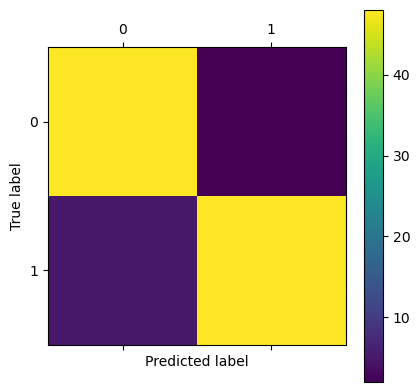

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93        50
         1.0       0.96      0.91      0.93        53

    accuracy                           0.93       103
   macro avg       0.93      0.93      0.93       103
weighted avg       0.93      0.93      0.93       103



In [47]:
cm = metrics.confusion_matrix(y_test, best_GB_model.predict(x_test))
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(metrics.classification_report(y_test, best_GB_model.predict(x_test)))

Model 6 - Guassian Naive Bayes

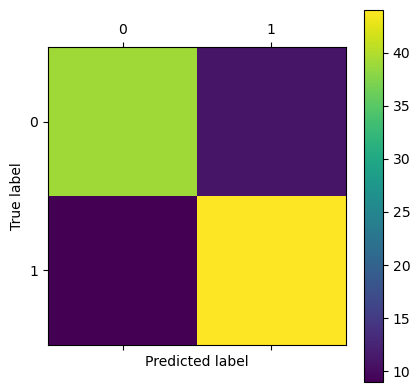

              precision    recall  f1-score   support

         0.0       0.81      0.78      0.80        50
         1.0       0.80      0.83      0.81        53

    accuracy                           0.81       103
   macro avg       0.81      0.81      0.81       103
weighted avg       0.81      0.81      0.81       103



In [48]:
cm = metrics.confusion_matrix(y_test, best_NB_model.predict(x_test))
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(metrics.classification_report(y_test, best_NB_model.predict(x_test)))

### Model Evaluation - ROC & AUC

**All the classifier used here have predict_prob() function, generating the corresponding prediction probability of the classification as category "1"**

In [49]:
from sklearn.metrics import roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import metrics


Model 1 - Logistic Regression

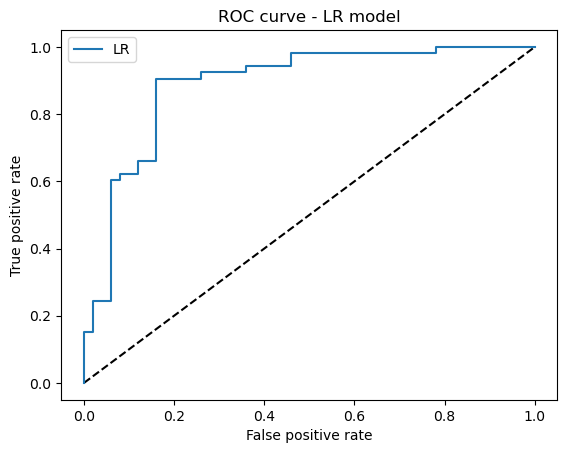

The AUC of LR model is 0.8875471698113208


In [50]:
# Use predict_proba to get the probability results of LR
y_pred_lr = best_LR_model.predict_proba(x_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)

# drawing ROC curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR model')
plt.legend(loc='best')
plt.show()

# AUC
print('The AUC of LR model is', metrics.auc(fpr_lr,tpr_lr))

Model 2 - KNN

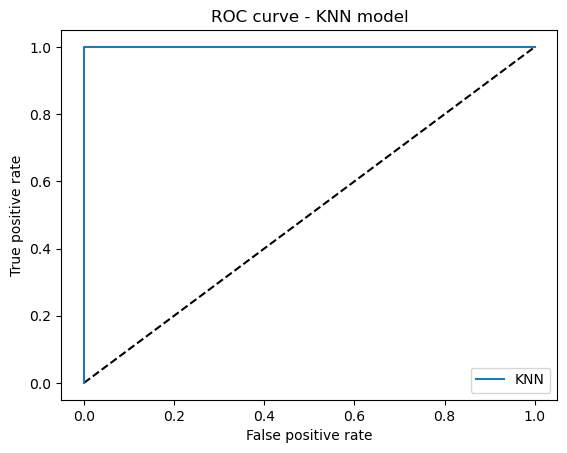

The AUC of KNN model is 1.0


In [51]:
# Use predict_proba to get the probability results of KNN
y_pred_knn = best_KNN_model.predict_proba(x_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)

# drawing ROC curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - KNN model')
plt.legend(loc='best')
plt.show()

# AUC
print('The AUC of KNN model is', metrics.auc(fpr_knn,tpr_knn))

Model 3 - Random Forest

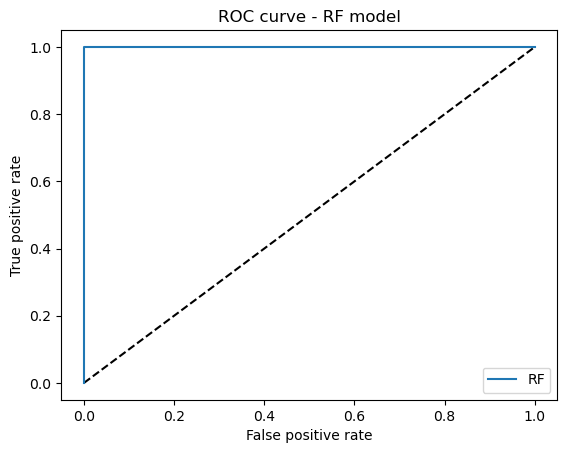

The AUC of RF model is 1.0


In [52]:
# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

# drawing ROC curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

# AUC
print('The AUC of RF model is', metrics.auc(fpr_rf,tpr_rf))

Model 4 - SVC

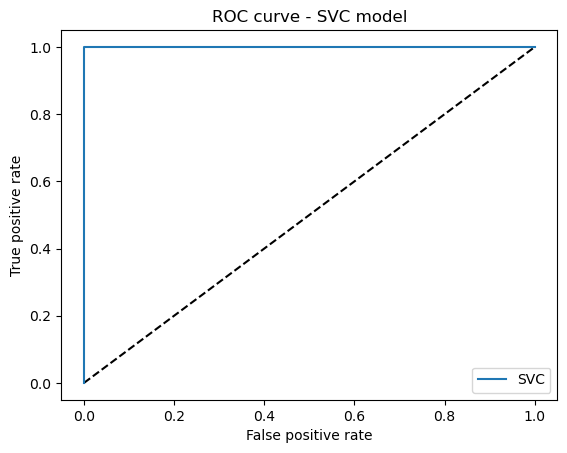

The AUC of SVC model is 1.0


In [53]:
# Use predict_proba to get the probability results of SVC
y_pred_svc = best_SVC_model.predict_proba(x_test)[:, 1]
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_pred_svc)

# drawing ROC curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_svc, tpr_svc, label='SVC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - SVC model')
plt.legend(loc='best')
plt.show()

# AUC
print('The AUC of SVC model is', metrics.auc(fpr_svc,tpr_svc))

Model 5 - GB Classifier

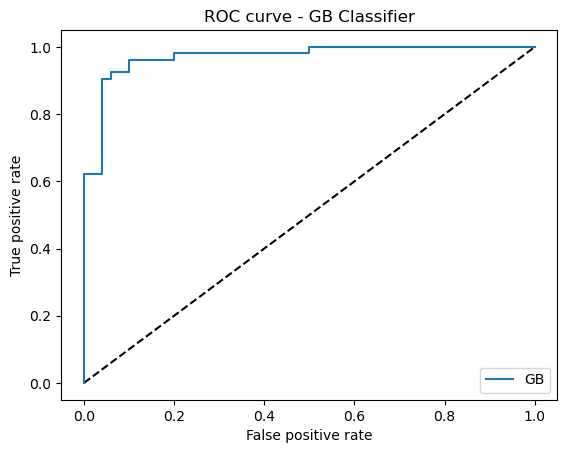

The AUC of GB Classifier is 0.9705660377358492


In [54]:
# Use predict_proba to get the probability results of GB Classifier
y_pred_gb = best_GB_model.predict_proba(x_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_gb)

# drawing ROC curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_gb, tpr_gb, label='GB')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - GB Classifier')
plt.legend(loc='best')
plt.show()

# AUC
print('The AUC of GB Classifier is', metrics.auc(fpr_gb,tpr_gb))

Model 6 - Gaussian Naive Bayes Classifier

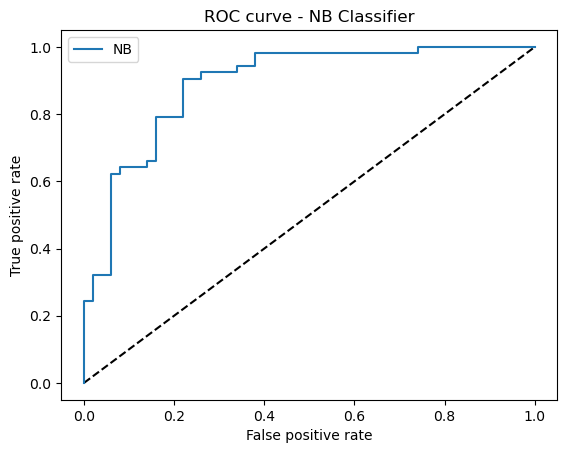

The AUC of NB Classifier is 0.8905660377358491


In [55]:
# Use predict_proba to get the probability results of Gaussian Naive Bayes Classifier
y_pred_gb = best_NB_model.predict_proba(x_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_gb)

# drawing ROC curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_gb, tpr_gb, label='NB')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - NB Classifier')
plt.legend(loc='best')
plt.show()

# AUC
print('The AUC of NB Classifier is', metrics.auc(fpr_gb,tpr_gb))

**It seems that KNN, RF, SVC are the relatively suitable in this case, correctly predicting all the data within test dataset**

However, due to the shortest average training time for KNN (0.48s per hyperparameter attempt), it seems knn is the most efficient one.

## RF - Feature Importance Discussion
**Since the RF (2nd best model) can easily extract each feature's weight**, here we take it as example to see why the original author think **serum creatinine** and **ejection fraction** are the sole features to predict the mortality from the HF.

In [56]:
importances = best_RF_model.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by RF:")
for ind in range(x.shape[1]):
  print ("{0} : {1}".format(x.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by RF:
cp_0 : 0.1128
ca_0 : 0.1015
oldpeak : 0.0981
thalach : 0.0883
thal_2 : 0.0796
age : 0.0733
thal_3 : 0.0716
chol : 0.0627
trestbps : 0.0625
exang : 0.0377
slope_2 : 0.0319
slope_1 : 0.0319
sex : 0.0273
cp_2 : 0.0222
restecg : 0.0194
ca_1 : 0.0194
ca_2 : 0.0126
cp_3 : 0.0122
fbs : 0.0094
cp_1 : 0.0089
thal_1 : 0.006
ca_3 : 0.0059
slope_0 : 0.0048


From the result above, we can see that chest pain type 0 (cp_0), no major vessels colored by flourosopy (ca_0) have strong impact on the occurrence of heart failure. 

Apart from that, after-exercise ST depression on EEG (oldpeak), and maximum heart rate achieved (thalach) also have a relative major impact on HF occurrence.

## Insight

 KNN, RF, SVC are excelled in predicting the occurrence of Heart failure through the given 13 features in this dataset, with proper feature preprocessing. 
 However, we need more data to verify the model prediction & train the model to **avoid overfitting**. 